# K-Nearest Neighbors     

In [1]:
%load_ext autoreload
%autoreload 2
 
%matplotlib inline
%matplotlib notebook

In [2]:
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('./Datasets/clean_train.csv')
df_test = pd.read_csv('./Datasets/Tan_Test.csv')

In [4]:
df.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,date_recordedIs_month_start_False,date_recordedIs_month_start_True,date_recordedIs_quarter_end_False,date_recordedIs_quarter_end_True,date_recordedIs_quarter_start_False,date_recordedIs_quarter_start_True,date_recordedIs_year_end_False,date_recordedIs_year_start_False,date_recordedIs_year_start_True,status_group
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,1,0,1,0,1,0,1,1,0,functional
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,1,0,1,0,1,0,1,1,0,functional
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,1,0,1,0,1,0,1,1,0,functional
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,1,0,1,0,1,0,1,1,0,non functional
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,1,0,1,0,1,0,1,1,0,functional


In [5]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year',
       ...
       'date_recordedIs_month_start_False', 'date_recordedIs_month_start_True',
       'date_recordedIs_quarter_end_False', 'date_recordedIs_quarter_end_True',
       'date_recordedIs_quarter_start_False',
       'date_recordedIs_quarter_start_True', 'date_recordedIs_year_end_False',
       'date_recordedIs_year_start_False', 'date_recordedIs_year_start_True',
       'status_group'],
      dtype='object', length=204)

In [27]:
df.shape

(59400, 204)

In [6]:
df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [7]:
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


# Modeling

### Feature Set

In [8]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values

### Normalize the Data

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

### Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [11]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (44550, 202) (44550,)
Testing set:  (14850, 202) (14850,)


### Training the Model
Starting the algorithm with k=4 neighbors at first.

In [15]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicting

In [16]:
yhat = knn.predict(X_test)

### Accuracy Evaluation
Using __accuracy classification score__ to compute subset accuracy. This function is equal to the Jaccard similarity score function. This computes how closely the actual labels and the predicted labels matched in the train set.

In [19]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9502132435465769
Test set Accuracy:  0.9097643097643098


### Which K is most accurate?
Examining what number of K nearest neighbors is the most accurate number to use.

In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    # Train model and Predict
    knn_ = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat_ = knn_.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_)
    
    std_acc[n-1] = np.std(yhat_==y_test)/np.sqrt(yhat_.shape[0])

In [22]:
mean_acc

array([0.93286195, 0.9179798 , 0.91710438, 0.90976431, 0.90505051,
       0.9006734 , 0.89521886, 0.89535354, 0.89097643])

### Plotting the accuracy for different number of neighbors

<IPython.core.display.Javascript object>


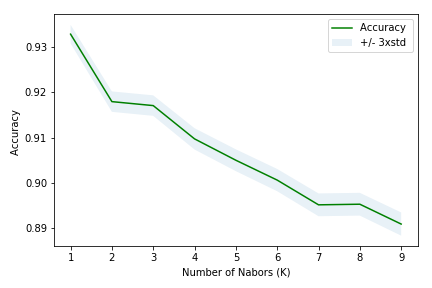

In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9328619528619528 with k= 1


In [12]:
# Train the model using 1 nearest neighbor
k = 1
knn1 = KNeighborsClassifier(n_neighbors = k)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
yhat1 = knn1.predict(X_test)

In [15]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn1.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  1.0
Test set Accuracy:  0.9328619528619528


### Confusion Matrix

In [16]:
# Create a confusion matrix for K=1 model.
print(classification_report(y_test, yhat1))
pd.DataFrame(confusion_matrix(y_test, yhat1), columns=['Pred +', 'Pred Fix', 'Pred -'], index=['Act +', 'Pred Fix', 'Act -'])

                         precision    recall  f1-score   support

             functional       0.93      0.95      0.94      8071
functional needs repair       0.94      0.82      0.88      1089
         non functional       0.93      0.92      0.93      5690

              micro avg       0.93      0.93      0.93     14850
              macro avg       0.94      0.90      0.92     14850
           weighted avg       0.93      0.93      0.93     14850



,Pred +,Pred Fix,Pred -
Act +,7707,21,343
Pred Fix,130,896,63
Act -,408,32,5250


In [ ]:
X2 = 